<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns


In [3]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-05-17 11:44:16--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22722 (22K) [text/plain]
Saving to: ‘data_phot.csv’

data_phot.csv       100%[===================>]  22.19K  --.-KB/s    in 0.002s  

2021-05-17 11:44:17 (9.02 MB/s) - ‘data_phot.csv’ saved [22722/22722]



In [4]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375
...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403


In [83]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2  
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,d_hi-d,d_lo-d,sd
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,0.662431,-0.651813,0.005309


In [147]:
#GENERATE
def GENERATE() :
  for i in range(208) :
    data_sample = np.random.normal(data_phot.d_est[i] ,data_phot.sd[i], 10**4)
    #print(i)
    print(data_sample)    
#data_sample = np.random.normal(data_phot.d_est[i] ,data_phot.sd[i], 10**4)
sample = GENERATE()
#sample = np.array(sample)
#sample_frame = pd.DataFrame(sample)
#sample
#data_sample

[192.89950132 192.98840917 192.91304159 ... 192.88787712 193.00531206
 192.98315279]
[106.5360168  106.50681245 106.49671018 ... 106.50931416 106.53310194
 106.51148833]
[40.70637035 40.70630333 40.70637537 ... 40.70628259 40.70622878
 40.70633932]
[148.66194457 148.68097642 148.67795737 ... 148.66171731 148.67480701
 148.66499696]
[201.86382711 201.86227553 201.89508714 ... 201.85711729 201.85525069
 201.83797437]
[111.96824254 111.97068941 111.97095879 ... 111.97212069 111.96560887
 111.97405636]
[144.09966426 144.10368745 144.10444055 ... 144.11143555 144.09800178
 144.10829224]
[45.52402914 45.52389483 45.52403556 ... 45.52398678 45.52406079
 45.52405076]
[172.64586895 172.67630474 172.63716147 ... 172.65424053 172.66855141
 172.68963696]
[23.99706996 23.99707607 23.99704921 ... 23.99703552 23.99704905
 23.99707422]
[110.16927449 110.17338129 110.16583077 ... 110.16064977 110.16668979
 110.15879523]
[178.86971654 178.79992859 178.8008337  ... 178.85027718 178.87530747
 178.89567244

In [142]:
sample_frame

""


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


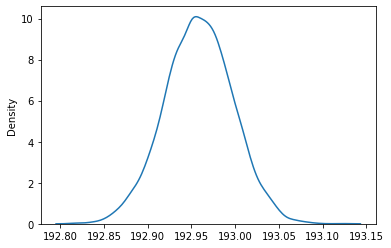

In [65]:
sns.distplot(data_sample , hist=False)

In [79]:
# M = m - 5[log(d)-1] - A
M_r = data_phot.r[0] - 5 * (np.log10(sample)-1) - data_phot.A_r[0]
M_r

,M_r
0,10.501745
1,10.501381
2,10.500657
3,10.500224
4,10.501798
...,...
9995,10.500356
9996,10.500835
9997,10.501189
9998,10.501276


In [81]:
np.mean(M_r)

M_r    10.501142
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


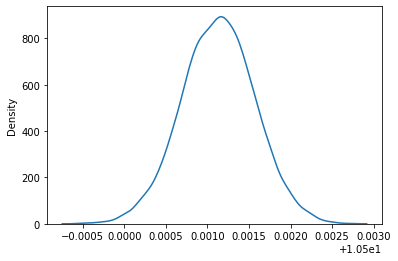

In [77]:
sns.distplot(M_r , hist=False)